# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1: полносвязные сети

**ФИО:** Моисеенко Александра Сергеевна

**Факт о себе:** пару недель назада сдала на права, до сих пор радаюсь


## Общая информация

__Дата выдачи:__ 22.09.2025

__Мягкий дедлайн:__ 23:59MSK 12.10.2025

__Жесткий дедлайн:__ 23:59MSK 19.10.2025


## Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).  Если два студента сгенерировали в нейронке одинаковые либо похожие решения, это считается плагиатом и приводит к обнулению обеих работ.

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Итогова оценка считается как

$$
min(part_1, part_2) \cdot 0.6 + max(part_1, part_2) \cdot 0.2 + part_3 \cdot 0.2
$$

где $part_1$, $part_2$ и $part_3$ - оценки за первую, вторую и третью части работы

> Также, за домашнее задание выставляется 0, если не сделано нулевое задание либо нет подробного описания ваших экспериментов в третьей части.

## Оформление

1. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться.
2. Вверху файла подпишите фамилию, имя и какой-то занимательный факт о себе.
3. Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

Из каждого проведённого эксперимента делайте выводы и фиксируйте их. Эти выводы не должны быть поверхностными и очевидными. Не будьте мудрым королём.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/king.png" width="300">
</center>

**Пример плохого вывода:** Синенькая линия идет вверх, а красная вниз. Черненькая идет вниз, а потом вверх.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-ds/iad-deep-learning/refs/heads/master/2025/homeworks/bad_lines.png" width="600">
</center>

## О задании

Вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [1]:
import torch
from torch import nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import random

from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

Начнем с того, что скачаем и загрузим данные:

In [2]:
!wget -O yearpredictionmsd.zip https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip

--2025-10-12 16:34:28--  https://archive.ics.uci.edu/static/public/203/yearpredictionmsd.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘yearpredictionmsd.zip’

yearpredictionmsd.z     [            <=>     ] 201.24M  41.9MB/s    in 4.3s    

2025-10-12 16:34:33 (47.0 MB/s) - ‘yearpredictionmsd.zip’ saved [211011981]



In [3]:
df = pd.read_csv('yearpredictionmsd.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Посмотрим на статистики по данным.

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

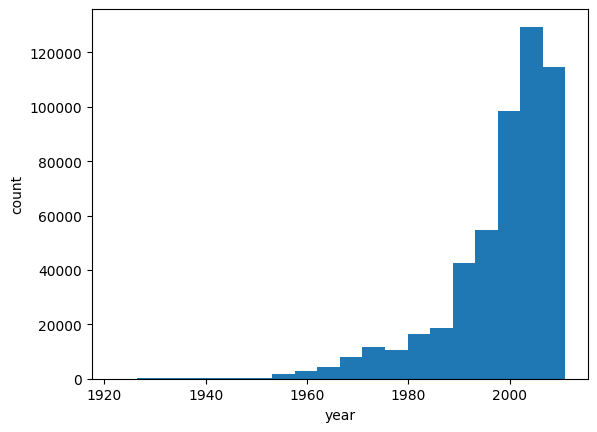

Range: 1922 - 2011
Unique values: 89


In [5]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])

X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

X_train.shape, X_test.shape

((386508, 90), (128837, 90))

## Полезные советы:

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Если вы чего-то не знаете, не стесняйтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению и `pytorch`. Но не забывайте, что за списанный код без ссылки на источник последует наказание.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так.

- Пользуйтесь утилитами, которые вам предоставляет `pytorch` (например, `Dataset` и `Dataloader`). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего, вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

- При желании вы можете логгировать метрики обучения и свои эксперименты в WandB либо любой другой сервис. Не забудьте приложить к тетрадке ссылку на результаты экспериментов либо скришноты графиков с пояснениями, что проверяющий должен на них увидеть.

- Финальное значение тестовой метрики для удобства проверки выведите в тетрадке.

## Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

Для выполнения данного задания (и всех последующих) предобработайте данные.

1. Зафиксируйте random_seed везде где только возможно. Вам предоставлена функция для этого, однако вы можете дополнить ее своими дополнениями.
2. Обучите `StandartScaler` и предобработайте ваши данные. В следующих заданиях можете использовать другой `scaler` или вообще отказаться от него.


In [7]:
def set_global_seed(seed: int) -> None:
    """Set global seed for reproducibility.
    :param int seed: Seed to be set
    """
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

    # также можно зафиксировать seed для Dataloader
    g = torch.Generator()
    g.manual_seed(seed)
    return g

# Сид для каждого worker в Dataloader
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = set_global_seed(42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge(alpha = 1, random_state = 42)
model.fit(X_train_scaled, y_train)
y_pred_ridge = model.predict(X_test_scaled)

rmse_for_model = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f'RMSE для Ridge регрессии: {round(rmse_for_model, 2)}')
# your code here  ⟅⎰᨟﹏᨟⎱⟆

RMSE для Ridge регрессии: 9.47


Лучшая константа для RMSE это среднее. Используйте среднее, расчитанное на трэйне в качестве прогноза для теста и посчитайте для такой наивной модели RMSE.

In [9]:
 # your code here  ⟅⎛ꌩωꌩ⎞⟆
const = np.mean(y_train)
y_pred_const = np.ones(y_test.shape) * const
best_rmse_metric = np.sqrt(mean_squared_error(y_test, y_pred_const))

print(f'RMSE для константного прогноза: {round(best_rmse_metric, 2)}')

RMSE для константного прогноза: 10.85


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию. Тестовую выборку мы будем использовать только для того, чтобы измерить итоговую метрику качества модели.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Часть I. Обучаем линейную регрессию (максимум 10 баллов)

**Задание 1 (10 баллов):** Обучите в `pytorch` линейную регрессию.

- Создайте модель линейной регрессии, которая будет состоять только из одного `Linear()` слоя.
   
- Напишите цикл обучения вашей линейной регрессии. В нем реализуйте подсчет функции потерь, сделайте шаг градиентного спуска. Запрещено использовать готовые оптимизаторы и loss-функции из библиотеки `pytorch`. Для подсчета градиента воспользуйтесь методом backward.
   
- Запустите обучение на 10 эпохах, после каждой проверяйте значение целевой метрики на тестовой выборке.
   
- Выведите на экран графики метрики и значения функции потерь на тестовой и обучающей выборке.

В данном задании нет цели побить какой-то порог по метрике. Ваша задача &mdash; убедиться в том, что ваш рукописный цикл обучения работает. Для ускорения вычислений и обучения модели можете брать только срез данных, а не весь датасет.

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

X_train_tensor = torch.tensor(X_train[:10000], dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val[:3333], dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test[:4444], dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train[:10000], dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val[:3333], dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test[:4444], dtype=torch.float32).to(device)

In [12]:
def rmse(y_pred, y_true):
  return torch.sqrt(((y_pred.squeeze() - y_true)**2).mean())

from torch import nn
import torch.nn.functional as F

class LinearRegression(nn.Module):
  def __init__ (self, in_features):
    super().__init__()
    self.model = nn.Linear(in_features=in_features, out_features = 1)
  def forward(self, x):
    return self.model(x)

model = LinearRegression(in_features = X_train_tensor.shape[1]).to(device)
num_epochs = 10
lr = 0.0001

train_losses = []
val_losses = []

for e in range(num_epochs):

  model.train()
  y_train_pred = model(X_train_tensor)
  loss = rmse(y_train_pred, y_train_tensor)

  model.zero_grad()
  loss.backward()

  with torch.no_grad():
    for w in model.parameters():
      w -= lr * w.grad

  model.eval()
  with torch.no_grad():
    y_val_pred = model(X_val_tensor)
    val_loss = rmse(y_val_pred, y_val_tensor)

  train_losses.append(loss.item())
  val_losses.append(val_loss.item())

  print(f'Эпоха {e+1}: \n Train Loss: {round(loss.item(), 2)}, Val Loss: {round(val_loss.item(), 2)}')


Эпоха 1: 
 Train Loss: 1812.76, Val Loss: 894.71
Эпоха 2: 
 Train Loss: 913.2, Val Loss: 896.23
Эпоха 3: 
 Train Loss: 900.53, Val Loss: 872.79
Эпоха 4: 
 Train Loss: 889.96, Val Loss: 880.66
Эпоха 5: 
 Train Loss: 881.55, Val Loss: 857.85
Эпоха 6: 
 Train Loss: 875.61, Val Loss: 875.23
Эпоха 7: 
 Train Loss: 872.66, Val Loss: 853.02
Эпоха 8: 
 Train Loss: 873.49, Val Loss: 884.72
Эпоха 9: 
 Train Loss: 878.87, Val Loss: 863.91
Эпоха 10: 
 Train Loss: 889.06, Val Loss: 911.06


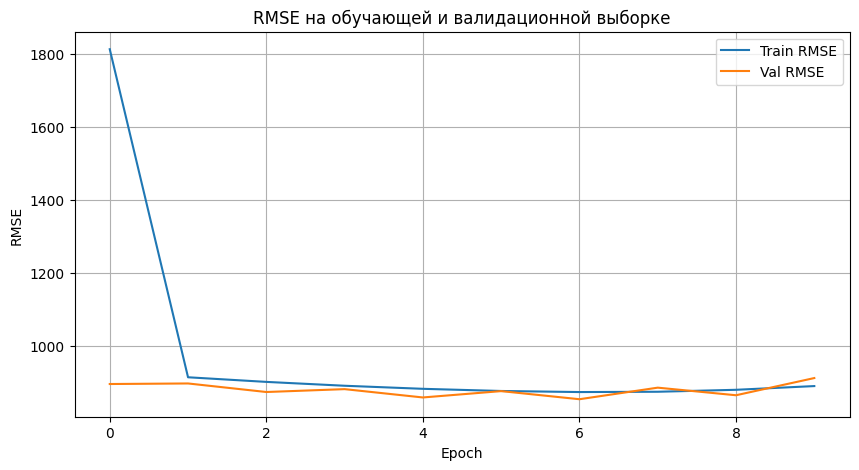

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(train_losses, label = 'Train RMSE')
plt.plot(val_losses, label='Val RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE на обучающей и валидационной выборке')
plt.legend()
plt.grid(True)
plt.show()

## Часть II. Заводим нейронную сеть (максимум 10 баллов)

Ниже нам предстоит реализовать довольно много различных нейросетей и поставить целую серию экспериментов. Чтобы это всё происходило без боли и страданий, нам нужно держать код в удобном виде.

При решении заданий вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться сигнатурами функций, которые приведены ниже. При необходимости вы можете добавить в них любые нужные вам аргументы и любой нужный функционал. Более того, хорошей практикой является не делать эти функции слишком громоздкими и выносить разные хитрые штуки в отдельные функции.

In [14]:
def training_epoch(model, optimizer, criterion, train_loader):
    """Одна эпоха обучения
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
    """

    # your code here  ♪┏(・o･)┛♪

    raise NotImplementedError


@torch.no_grad()
def validation_epoch(model, criterion, val_loader):
    """Одна эпоха валидации модели
    params:
        model - torch.nn.Module to be fitted
        criterion - loss function from torch.nn
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    """

    # your code here   ฅ^•ﻌ•^ฅ

    raise NotImplementedError


@torch.no_grad()
def predict(model, data_loader):
    """ Предсказания модели
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        data_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """

    # your code here  =^･ω･^=

    predicts = torch.ones(len(test_loader.dataset))
    return predicts


def train(model, optimizer, criterion, train_loader, val_loader, epochs):
    """ Обучение модели
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
        epochs - number of training epochs
    """

    # your code here  ¯\_(ツ)_/¯

    raise NotImplementedError

**Задание 2 (2 балла)**

Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве метрики качества мы используем RMSE. При его подсчёте вам нужно заменить предсказанный нейросеткой класс на конкретный год выпуска песни и использовать его как прогноз.

In [15]:
# your code here (￣ω￣)
def training_epoch(model, optimizer, criterion, train_loader):
    """Одна эпоха обучения
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
    """

    # your code here  ♪┏(・o･)┛♪
    train_loss= 0.0
    model.train()
    for x, y in train_loader:
      x = x.to(device)
      y = y.to(device)

      optimizer.zero_grad()
      logits = model(x)
      loss = criterion(logits, y)
      loss.backward()
      optimizer.step()

      train_loss += loss.item() * x.shape[0]

    train_loss /= len(train_loader.dataset)
    return train_loss

@torch.no_grad()
def validation_epoch(model, criterion, val_loader):
    """Одна эпоха валидации модели
    params:
        model - torch.nn.Module to be fitted
        criterion - loss function from torch.nn
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    """

    # your code here   ฅ^•ﻌ•^ฅ
    val_loss= 0.0
    model.eval()
    for x, y in val_loader:
      x = x.to(device)
      y = y.to(device)

      logits = model(x)
      loss = criterion(logits, y)
      val_loss += loss.item() * x.shape[0]

    val_loss /= len(val_loader.dataset)

    return val_loss


@torch.no_grad()
def predict(model, data_loader):
    """ Предсказания модели
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        data_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """

    # your code here  =^･ω･^=
    model.eval()
    predicts = []

    for x, y in data_loader:
        x = x.to(device)
        logits = model(x).argmax(dim=1).cpu()

        predicts.append(logits)

    return torch.cat(predicts, dim=0).squeeze()

def train(model, optimizer, criterion, train_loader, val_loader, epochs):
    """ Обучение модели
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        val_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
        epochs - number of training epochs
    """

    # your code here  ¯\_(ツ)_/¯
    train_losses= []
    val_losses = []

    for epoch in range(1, epochs + 1):
        train_loss = training_epoch(
            model, optimizer, criterion, train_loader)

        val_loss = validation_epoch(
            model, criterion, val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f'Epoch {epoch}/{epochs}: Train Loss = {round(train_loss, 4)}, Val Loss = {round(val_loss, 4)}')

In [16]:
from torch.utils.data import Dataset, DataLoader

class SongDataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.int64)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, i):
    return self.x[i], self.y[i]

class Song(nn.Module):
  def __init__(self, in_features, num_classes, hidden_size=128):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes)
    )

  def forward(self, x):
    return self.model(x)

unique_years = np.sort(np.unique(y_train))
year_to_class = {year: i for i, year in enumerate(unique_years)}
class_to_year = {i: year for year, i in year_to_class.items()}
y_train_enc = np.array([year_to_class[i] for i in y_train])
y_val_enc = np.array([year_to_class[i] for i in y_val])

train_dataset2 = SongDataset(X_train, y_train_enc)
val_dataset2 = SongDataset(X_val, y_val_enc)

train_loader2 = DataLoader(train_dataset2, batch_size=64, shuffle=True, generator=g)
val_loader2   = DataLoader(val_dataset2,  batch_size=64, shuffle=False, generator=g)


from sklearn.metrics import mean_squared_error

IN_FEATURES = X_train.shape[1]
NUM_CLASSES = len(unique_years)
LR = 1e-3
NUM_EPOCH = 4

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model2 = Song(in_features=IN_FEATURES, num_classes=NUM_CLASSES).to(device)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=LR)
criterion2 = nn.CrossEntropyLoss()

train(model2, optimizer2, criterion2, train_loader2, val_loader2, NUM_EPOCH)

from sklearn.metrics import mean_squared_error

y_pred_classes = predict(model2, val_loader2).numpy()
y_pred_years = np.array([class_to_year[i] for i in y_pred_classes])
rmse = mean_squared_error(y_val, y_pred_years)**0.5

print(f'RMSE для валидационной выборки: {round(rmse, 2)}')

Epoch 1/4: Train Loss = 4.7047, Val Loss = 4.3585
Epoch 2/4: Train Loss = 4.2916, Val Loss = 4.2362
Epoch 3/4: Train Loss = 4.1778, Val Loss = 4.1318
Epoch 4/4: Train Loss = 4.081, Val Loss = 4.0411
RMSE для валидационной выборки: 13.98


**Задание 3 (1 балл).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** RMSE получилось больше, чем для Ridge Regression (9.47) и для константного прогноза (10.85), что говорит о том, что побить бейзлайн не удалось, возможно, это связано с тем, что для этой идеи учить классификатор не лучшая идея, ведь классы не упорядочены и для классификатора ошибиться на 1 год и на 5 лет одинаково


**Задание 4 (2 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [17]:
# your code here ( ⚆ _ ⚆)
g
class SongDatasetReg(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, i):
    return self.x[i], self.y[i]

class SongRegressor(nn.Module):
    def __init__(self, in_features, hidden_size=128):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )
    def forward(self, x):
        return self.model(x)

@torch.no_grad()
def rmse4(model, dataloader, device):
  model.eval()
  predicts = []
  trues = []

  for x, y in dataloader:
    x = x.to(device)
    y = y.to(device)
    pred = model(x).cpu()
    true = y.cpu()

    predicts.append(pred)
    trues.append(true)

  predicts = torch.cat(predicts, dim=0)
  trues = torch.cat(trues, dim=0)

  return torch.sqrt(torch.mean((predicts - trues)**2)).item()

train_dataset4 = SongDatasetReg(X_train, y_train)
val_dataset4 = SongDatasetReg(X_val, y_val)

train_loader4 = DataLoader(train_dataset4, batch_size=64, shuffle=True, generator=g)
val_loader4   = DataLoader(val_dataset4,  batch_size=64, shuffle=False, generator=g)

In [18]:
IN_FEATURES4 = X_train.shape[1]
LR4 = 1e-6
EPOCHS4 = 4

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model4 = SongRegressor(in_features=IN_FEATURES4).to(device)
optimizer4 = torch.optim.SGD(model4.parameters(), lr=LR4)
criterion4 = nn.MSELoss()

train(model4, optimizer4, criterion4, train_loader4, val_loader4, EPOCHS4)
print()
print(f'RMSE для валидационной выборки, регрессия: {round(rmse4(model4, val_loader4, device), 2)}')

Epoch 1/4: Train Loss = 13677230.9578, Val Loss = 3926330.1263
Epoch 2/4: Train Loss = 3907497.0663, Val Loss = 3855902.2954
Epoch 3/4: Train Loss = 4492429.9991, Val Loss = 3787052.6824
Epoch 4/4: Train Loss = 3772676.32, Val Loss = 3719131.423

RMSE для валидационной выборки, регрессия: 1928.5


**Задание 5 (1 балл).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** меньшие значения lr помогли избавиться от значений nan или inf в лоссах, однако стабилизировать обучение не получилось. Значение RMSE сильно выше, чем в предыдущих моделях. Это может быть связано с тем, что распределение годов смещено вправо, выборка несбалансирована, а mse не устойчива к выбросам. Так же признаки нескалированы, из-за чего mse может быть огромным, так же есть смысл нормализоать целевую переменную, чтобы градиент не взрывался

**Задание 6 (1 балл).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [19]:
y_min = y_train.min()
y_max = y_train.max()

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    # your code here ᕦ(ò_óˇ)ᕤ
    return (sample - y_min) / (y_max - y_min)

def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    # your code here ( ⚆ ω ⚆)
    return sample * (y_max - y_min) + y_min

**Задание 7 (1 балл)** Теперь повторите эксперимент из **задания 4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений.

In [20]:
# your code here  ლ(ಠ益ಠლ)
g
y_train_norm = normalize(y_train)
y_val_norm = normalize(y_val)

class SongDatasetReg(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, i):
    return self.x[i], self.y[i]

class SongRegressorNorm(nn.Module):
    def __init__(self, in_features, hidden_size=128):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

train_dataset7 = SongDatasetReg(X_train, y_train_norm)
val_dataset7 = SongDatasetReg(X_val, y_val_norm)

train_loader7 = DataLoader(train_dataset7, batch_size=64, shuffle=True, generator=g)
val_loader7  = DataLoader(val_dataset7,  batch_size=64, shuffle=False, generator=g)

In [21]:
IN_FEATURES7 = X_train.shape[1]
LR7 = 1e-6
EPOCHS7 = 4

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model7 = SongRegressorNorm(in_features=IN_FEATURES7).to(device)
optimizer7 = torch.optim.SGD(model7.parameters(), lr=LR7)
criterion7 = nn.MSELoss()

train(model7, optimizer7, criterion7, train_loader7, val_loader7, EPOCHS7)

Epoch 1/4: Train Loss = 0.6318, Val Loss = 0.4279
Epoch 2/4: Train Loss = 0.1679, Val Loss = 0.0666
Epoch 3/4: Train Loss = 0.0533, Val Loss = 0.0474
Epoch 4/4: Train Loss = 0.0437, Val Loss = 0.0424


In [22]:
def rmse7(model, dataloader, device):
  model.eval()
  predicts = []
  trues = []

  for x, y in dataloader:
    x = x.to(device)
    y = y.to(device)
    pred = model(x).cpu()
    true = y.cpu()

    predicts.append(pred)
    trues.append(true)

  predicts = denormalize(torch.cat(predicts, dim=0))
  trues = denormalize(torch.cat(trues, dim=0))

  return torch.sqrt(torch.mean((predicts - trues)**2)).item()

print(f'RMSE для валидационной выборки: {round(rmse7(model7, val_loader7, device), 2)}')

RMSE для валидационной выборки: 18.33


**Задание 8 (2 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)

train_dataset8 = SongDatasetReg(X_train_norm, y_train_norm)
val_dataset8 = SongDatasetReg(X_val_norm, y_val_norm)

train_loader8 = DataLoader(train_dataset8, batch_size=64, shuffle=True, generator=g)
val_loader8  = DataLoader(val_dataset8,  batch_size=64, shuffle=False, generator=g)

IN_FEATURES8 = X_train_norm.shape[1]
LR8 = 1e-3
EPOCHS8 = 8

model8 = SongRegressorNorm(in_features=IN_FEATURES8).to(device)
optimizer8 = torch.optim.SGD(model8.parameters(), lr=LR8)
criterion8 = nn.MSELoss()

train(model8, optimizer8, criterion8, train_loader8, val_loader8, EPOCHS8)

print()
print(f'RMSE для валидационной выборки: {round(rmse7(model8, val_loader8, device), 2)}')

Epoch 1/8: Train Loss = 0.0347, Val Loss = 0.0193
Epoch 2/8: Train Loss = 0.0171, Val Loss = 0.0163
Epoch 3/8: Train Loss = 0.0156, Val Loss = 0.0155
Epoch 4/8: Train Loss = 0.0151, Val Loss = 0.015
Epoch 5/8: Train Loss = 0.0147, Val Loss = 0.0147
Epoch 6/8: Train Loss = 0.0144, Val Loss = 0.0144
Epoch 7/8: Train Loss = 0.0142, Val Loss = 0.0142
Epoch 8/8: Train Loss = 0.014, Val Loss = 0.014

RMSE для валидационной выборки: 10.54


Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть III. Улучшаем нейронную сеть (максимум 10 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 9 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [24]:
# your code here  ( ཀ ʖ̯ ཀ)
# SGD + Momentum
LR9_1 = 1e-3
EPOCHS9 = 8

model9_1 = SongRegressorNorm(in_features=IN_FEATURES8).to(device)
optimizer9_1 = torch.optim.SGD(model9_1.parameters(), lr=LR9_1, momentum=0.9)
criterion9 = nn.MSELoss()

print('SGD + Momentum')
train(model9_1, optimizer9_1, criterion9, train_loader8, val_loader8, EPOCHS9)
print()
print(f'RMSE для валидационной выборки: {round(rmse7(model9_1, val_loader8, device), 2)}')

SGD + Momentum
Epoch 1/8: Train Loss = 0.0177, Val Loss = 0.0139
Epoch 2/8: Train Loss = 0.0133, Val Loss = 0.0131
Epoch 3/8: Train Loss = 0.0128, Val Loss = 0.0127
Epoch 4/8: Train Loss = 0.0124, Val Loss = 0.0124
Epoch 5/8: Train Loss = 0.0121, Val Loss = 0.0121
Epoch 6/8: Train Loss = 0.0119, Val Loss = 0.012
Epoch 7/8: Train Loss = 0.0117, Val Loss = 0.0118
Epoch 8/8: Train Loss = 0.0116, Val Loss = 0.0117

RMSE для валидационной выборки: 9.61


In [25]:
# Adam
LR9_2 = 1e-3
EPOCHS9 = 8

model9_2 = SongRegressorNorm(in_features=IN_FEATURES8).to(device)
optimizer9_2 = torch.optim.Adam(model9_2.parameters(), lr=LR9_2)
criterion9 = nn.MSELoss()

print('Adam')
train(model9_2, optimizer9_2, criterion9, train_loader8, val_loader8, EPOCHS9)
print()
print(f'RMSE для валидационной выборки: {round(rmse7(model9_2, val_loader8, device), 2)}')

Adam
Epoch 1/8: Train Loss = 0.0113, Val Loss = 0.0102
Epoch 2/8: Train Loss = 0.01, Val Loss = 0.0102
Epoch 3/8: Train Loss = 0.0098, Val Loss = 0.0101
Epoch 4/8: Train Loss = 0.0097, Val Loss = 0.0101
Epoch 5/8: Train Loss = 0.0096, Val Loss = 0.0099
Epoch 6/8: Train Loss = 0.0095, Val Loss = 0.0099
Epoch 7/8: Train Loss = 0.0095, Val Loss = 0.0099
Epoch 8/8: Train Loss = 0.0094, Val Loss = 0.0099

RMSE для валидационной выборки: 8.85


Лоссы при Adama снизились, уменьшилась rmse, поэтому берем его


**Задание 10 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

In [26]:
# your code here  (๑-﹏-๑)
class SongRegressorDeep(nn.Module):
    def __init__(self, in_features, hidden_size=256):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

LR10 = 1e-3
EPOCHS10 = 8

model10 = SongRegressorDeep(in_features=IN_FEATURES8).to(device)
optimizer10 = torch.optim.Adam(model10.parameters(), lr=LR10)
criterion10 = nn.MSELoss()

train(model10, optimizer10, criterion10, train_loader8, val_loader8, EPOCHS10)

print()
print(f'RMSE для валидационной выборки: {round(rmse7(model10, val_loader8, device), 2)}')

Epoch 1/8: Train Loss = 0.0106, Val Loss = 0.0102
Epoch 2/8: Train Loss = 0.0098, Val Loss = 0.0099
Epoch 3/8: Train Loss = 0.0095, Val Loss = 0.0097
Epoch 4/8: Train Loss = 0.0093, Val Loss = 0.0097
Epoch 5/8: Train Loss = 0.0091, Val Loss = 0.0097
Epoch 6/8: Train Loss = 0.0089, Val Loss = 0.0096
Epoch 7/8: Train Loss = 0.0087, Val Loss = 0.0098
Epoch 8/8: Train Loss = 0.0085, Val Loss = 0.0096

RMSE для валидационной выборки: 8.74


Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__ Модель стала мощнее, лосс на обучающей и валидационной выборке снизился. RMSE уменьшилось. Однако, это может говорить о переобучении, поскольку модель начинает запоминать шум в данных, и поэтому предсказания могут быть не стабильными на новых данных.

**Задание 11 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

In [27]:
# your code here (❍ᴥ❍ʋ)
print('Dropout')
class SongRegressorDropout(nn.Module):
    def __init__(self, in_features, hidden_size=256):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, hidden_size),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_size // 2, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

LR11 = 1e-3
EPOCHS11 = 8

model11_1 = SongRegressorDropout(in_features=IN_FEATURES8).to(device)
optimizer11_1 = torch.optim.Adam(model11_1.parameters(), lr=LR11)
criterion11 = nn.MSELoss()

train(model11_1, optimizer11_1, criterion11, train_loader8, val_loader8, EPOCHS11)
print()
print(f'RMSE для валидационной выборки: {round(rmse7(model11_1, val_loader8, device), 2)}')

Dropout
Epoch 1/8: Train Loss = 0.011, Val Loss = 0.0104
Epoch 2/8: Train Loss = 0.0101, Val Loss = 0.0099
Epoch 3/8: Train Loss = 0.0099, Val Loss = 0.0099
Epoch 4/8: Train Loss = 0.0098, Val Loss = 0.0098
Epoch 5/8: Train Loss = 0.0097, Val Loss = 0.0097
Epoch 6/8: Train Loss = 0.0096, Val Loss = 0.0096
Epoch 7/8: Train Loss = 0.0095, Val Loss = 0.0097
Epoch 8/8: Train Loss = 0.0094, Val Loss = 0.0096

RMSE для валидационной выборки: 8.74


In [28]:
print('Batch')
class SongRegressorBatch(nn.Module):
    def __init__(self, in_features, hidden_size=256):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.BatchNorm1d(hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

model11_2 = SongRegressorBatch(in_features=IN_FEATURES8).to(device)
optimizer11_2 = torch.optim.Adam(model11_2.parameters(), lr=LR11)
criterion11 = nn.MSELoss()

train(model11_2, optimizer11_2, criterion11, train_loader8, val_loader8, EPOCHS11)
print()
print(f'RMSE для валидационной выборки: {round(rmse7(model11_2, val_loader8, device), 2)}')

Batch
Epoch 1/8: Train Loss = 0.011, Val Loss = 0.01
Epoch 2/8: Train Loss = 0.0099, Val Loss = 0.0098
Epoch 3/8: Train Loss = 0.0096, Val Loss = 0.0097
Epoch 4/8: Train Loss = 0.0094, Val Loss = 0.0096
Epoch 5/8: Train Loss = 0.0093, Val Loss = 0.0096
Epoch 6/8: Train Loss = 0.0091, Val Loss = 0.0096
Epoch 7/8: Train Loss = 0.0089, Val Loss = 0.0094
Epoch 8/8: Train Loss = 0.0088, Val Loss = 0.0095

RMSE для валидационной выборки: 8.66


Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__
* Dropuout помог слегка снизить переобучение и немного уменьшил RMSE, качество несильно увеличилось, так как дропаут "выкидывает" некоторые нейроны, однако модель становится устойчивее
* Batch Normalization дал лучшую сходимость и лучшее качество на валидации, а так же снизил RMSE, что является лучшим результатом среди всех уже проведенных экспериментов


**Задание 12 (1 балл).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению RMSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения). Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости RMSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [29]:
# your code here (｡❤‿❤｡)

lr_list = [1e-4, 1e-3, 1e-2, 1e-1]
train_rmse_lr = []
val_rmse_lr = []

for lr in lr_list:
  g = set_global_seed(42)

  print(f'lr = {lr}')

  model12_1 = SongRegressorBatch(in_features=IN_FEATURES8).to(device)
  optimizer12_1 = torch.optim.Adam(model12_1.parameters(), lr=lr)
  criterion12_1 = nn.MSELoss()

  train(model12_1, optimizer12_1, criterion12_1, train_loader8, val_loader8, EPOCHS11)

  rmse_train = round(rmse7(model12_1, train_loader8, device), 2)
  rmse_val = round(rmse7(model12_1, val_loader8, device), 2)
  train_rmse_lr.append(rmse_train)
  val_rmse_lr.append(rmse_val)

  print(f'Train RMSE: {rmse_train}')
  print(f'Val RMSE: {rmse_val}')
  print('\n')

lr = 0.0001
Epoch 1/8: Train Loss = 0.0163, Val Loss = 0.0104
Epoch 2/8: Train Loss = 0.0101, Val Loss = 0.0101
Epoch 3/8: Train Loss = 0.0097, Val Loss = 0.0099
Epoch 4/8: Train Loss = 0.0095, Val Loss = 0.0098
Epoch 5/8: Train Loss = 0.0094, Val Loss = 0.0098
Epoch 6/8: Train Loss = 0.0092, Val Loss = 0.0097
Epoch 7/8: Train Loss = 0.0091, Val Loss = 0.0097
Epoch 8/8: Train Loss = 0.009, Val Loss = 0.0097
Train RMSE: 8.24
Val RMSE: 8.76


lr = 0.001
Epoch 1/8: Train Loss = 0.011, Val Loss = 0.0101
Epoch 2/8: Train Loss = 0.0098, Val Loss = 0.0098
Epoch 3/8: Train Loss = 0.0096, Val Loss = 0.0098
Epoch 4/8: Train Loss = 0.0094, Val Loss = 0.0096
Epoch 5/8: Train Loss = 0.0092, Val Loss = 0.0096
Epoch 6/8: Train Loss = 0.0091, Val Loss = 0.0095
Epoch 7/8: Train Loss = 0.0089, Val Loss = 0.0095
Epoch 8/8: Train Loss = 0.0088, Val Loss = 0.0097
Train RMSE: 8.15
Val RMSE: 8.75


lr = 0.01
Epoch 1/8: Train Loss = 0.0107, Val Loss = 0.0101
Epoch 2/8: Train Loss = 0.01, Val Loss = 0.01
Epoch

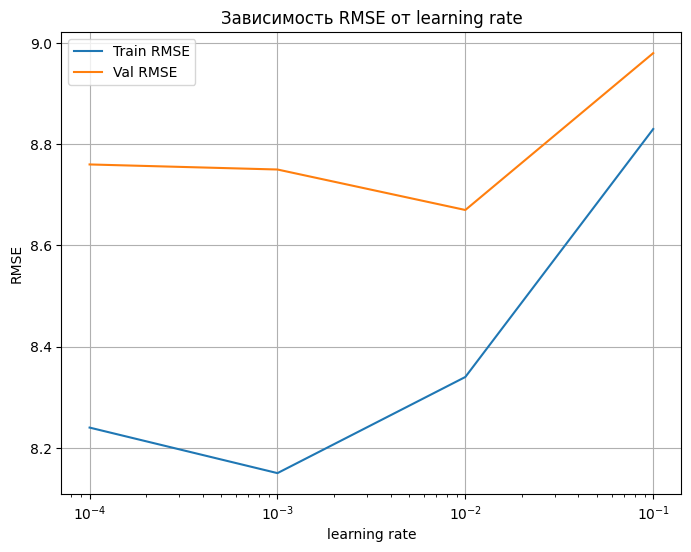

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(lr_list, train_rmse_lr, label='Train RMSE')
plt.plot(lr_list, val_rmse_lr, label='Val RMSE')
plt.xscale('log')
plt.xlabel('learning rate')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от learning rate')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
best_lr_ind = np.argmin(val_rmse_lr)
best_lr = lr_list[best_lr_ind]
best_rmse_lr = val_rmse_lr[best_lr_ind]
print(f'Лучший показатель:')
print(f'RMSE: {best_rmse_lr}')
print(f'Learning rate: {best_lr}')

Лучший показатель:
RMSE: 8.67
Learning rate: 0.01


In [32]:
 weight_decay_list = [0, 1e-6, 1e-5, 1e-4, 1e-3]
train_rmse_wd = []
val_rmse_wd = []

for wd in weight_decay_list:
  g = set_global_seed(42)

  print(f'weight_decay = {wd}')

  model12_2 = SongRegressorBatch(in_features=IN_FEATURES8).to(device)
  optimizer12_2 = torch.optim.Adam(model12_2.parameters(), lr=best_lr, weight_decay=wd)
  criterion12_2 = nn.MSELoss()

  train(model12_2, optimizer12_2, criterion12_2, train_loader8, val_loader8, EPOCHS11)

  rmse_train = round(rmse7(model12_2, train_loader8, device), 2)
  rmse_val = round(rmse7(model12_2, val_loader8, device), 2)
  train_rmse_wd.append(rmse_train)
  val_rmse_wd.append(rmse_val)

  print(f'Train RMSE: {round(rmse_train, 2)}')
  print(f'Val RMSE: {round(rmse_val, 2)}')
  print('\n')


weight_decay = 0
Epoch 1/8: Train Loss = 0.0107, Val Loss = 0.0101
Epoch 2/8: Train Loss = 0.01, Val Loss = 0.0101
Epoch 3/8: Train Loss = 0.0098, Val Loss = 0.0098
Epoch 4/8: Train Loss = 0.0096, Val Loss = 0.0098
Epoch 5/8: Train Loss = 0.0095, Val Loss = 0.0096
Epoch 6/8: Train Loss = 0.0094, Val Loss = 0.0096
Epoch 7/8: Train Loss = 0.0093, Val Loss = 0.0098
Epoch 8/8: Train Loss = 0.0093, Val Loss = 0.0096
Train RMSE: 8.39
Val RMSE: 8.73


weight_decay = 1e-06
Epoch 1/8: Train Loss = 0.0108, Val Loss = 0.0104
Epoch 2/8: Train Loss = 0.0103, Val Loss = 0.0103
Epoch 3/8: Train Loss = 0.0102, Val Loss = 0.0102
Epoch 4/8: Train Loss = 0.0102, Val Loss = 0.0101
Epoch 5/8: Train Loss = 0.0102, Val Loss = 0.0102
Epoch 6/8: Train Loss = 0.0102, Val Loss = 0.0101
Epoch 7/8: Train Loss = 0.0102, Val Loss = 0.0102
Epoch 8/8: Train Loss = 0.0101, Val Loss = 0.0101
Train RMSE: 8.87
Val RMSE: 8.95


weight_decay = 1e-05
Epoch 1/8: Train Loss = 0.0111, Val Loss = 0.0108
Epoch 2/8: Train Loss = 0

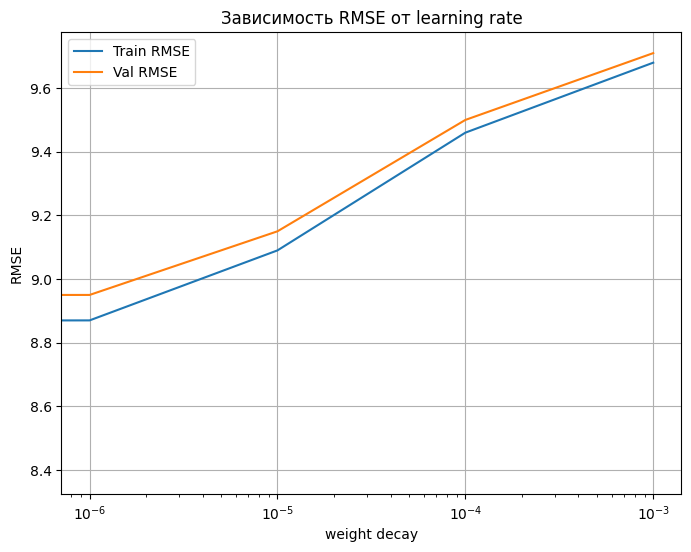

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(weight_decay_list, train_rmse_wd, label='Train RMSE')
plt.plot(weight_decay_list, val_rmse_wd, label='Val RMSE')
plt.xscale('log')
plt.xlabel('weight decay')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от learning rate')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
best_wd_ind = np.argmin(val_rmse_wd)
best_wd = weight_decay_list[best_wd_ind]
best_rmse_wd = val_rmse_wd[best_wd_ind]
print(f'Лучший показатель:')
print(f'RMSE: {best_rmse_wd}')
print(f'Learning rate: {best_lr}')
print(f'Weight decay: {best_wd}')

Лучший показатель:
RMSE: 8.73
Learning rate: 0.01
Weight decay: 0


Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__ по результатам, лучшее качество на валидации и на трейне показал lr=1e-2. Это значение мы взяли для эксперимента по поиску weight decay, в ходе которого выяснилось, что наилучшим параметром будет wd=0. По графикам так же видно, что при увеличении lr еще больше качество снижается, что логично, ведь у модели больше шансов пройти мимо минимума из-за большого шага. Также качество снижается при больших wd

> Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.




**Задание 13 (6 баллов).**

Думаю направление размышлений вы поняли. Постарайтесь с помощью своих экспериментов выбить максимально возможное значение RMSE на тестовой выборке. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 8.90 $ &mdash; 2 балла
- $\text{RMSE} \le 8.80 $ &mdash; 4 балла
- $\text{RMSE} \le 8.75 $ &mdash; 6 баллов

**Различные трюки, которые можно попробовать:**

1. Попробуйте делать во время обучения раннюю остановку обучения и сохранять модель в тот момент, когда качество на валидации начало ухудшаься, то есть модель начала переобучаться
2. Попробуйте усложнить архитектуру нейросет
    - Больше/меньше нейронов
    - Больше/меньше слоёв
    - Другие функции активации (tanh, relu, leaky relu, elu etc)
    - Регуляризация (dropout, l1,l2)
3. Попробуйте другие оптимизаторы, а также смену скорости обучения по расписанию.

И это далеко не полный список. Обратите внимание, что делать grid_search для больших сеток это довольно времязатратное занятие... Попробовать несколько значений, как мы делали в заданиях выше, адекватно, но делать какой-то огромный перебор будет самоубийством.

Логгируйте свои эксперименты. За один прогон пробуйте одно изменение. Иначе будет непонятно какие именно изменения улучшили качество, а какие ухудшили.

In [36]:
class SongRegressorFinal(nn.Module):
    def __init__(self, in_features, hidden_size=256):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.LeakyReLU(0.1),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.BatchNorm1d(hidden_size // 2),
            nn.LeakyReLU(0.1),
            nn.Linear(hidden_size // 2, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [39]:
model13 = SongRegressorFinal(in_features=IN_FEATURES8).to(device)
optimizer13 = torch.optim.Adam(model13.parameters(), lr=best_lr, weight_decay=best_wd)
criterion13 = nn.MSELoss()

train(model13, optimizer13, criterion13, train_loader8, val_loader8, EPOCHS11)

Epoch 1/8: Train Loss = 0.0108, Val Loss = 0.0103
Epoch 2/8: Train Loss = 0.0101, Val Loss = 0.0101
Epoch 3/8: Train Loss = 0.0099, Val Loss = 0.0098
Epoch 4/8: Train Loss = 0.0098, Val Loss = 0.0097
Epoch 5/8: Train Loss = 0.0097, Val Loss = 0.0098
Epoch 6/8: Train Loss = 0.0096, Val Loss = 0.0098
Epoch 7/8: Train Loss = 0.0095, Val Loss = 0.0097
Epoch 8/8: Train Loss = 0.0095, Val Loss = 0.0097


In [44]:
print(f'RMSE на обучающей выборке: {round(rmse7(model13, train_loader8, device), 2)}')

RMSE на обучающей выборке: 8.5


In [40]:
# your code here
# ༼ つ ಥ_ಥ ༽つ
X_test_norm = scaler.transform(X_test)
y_test_norm = normalize(y_test)
test_dataset8 = SongDatasetReg(X_test_norm, y_test_norm)

test_loader8 = DataLoader(test_dataset8, batch_size=64, shuffle=False, generator=g)
rmse_test = round(rmse7(model13, test_loader8, device), 2)
print(f'RMSE на тестовой выборке {rmse_test}')

RMSE на тестовой выборке 8.7


Опишите результаты экспериментов (без их описания за работу ставится ноль баллов)

__Ваше подробное описание:__ в качестве эксперимента я заменила функцию активации ReLU на функцию активации LeakyReLU, который учитывает так же отрицательные значения. Заченение альфа было взято по умолчанию. Качество на трейне заметно улучшилось, а качество на тесте удовлетворяет условиям задачи

## Бонус (0.1 балла)

Прикрепите фотографию того, как вы начали этот сентябрь. Какую самую классную эмоцию вы испытали за прошедший месяц?

__Это я сходила на хоккей, спектр эмоций был очень разнообразный__
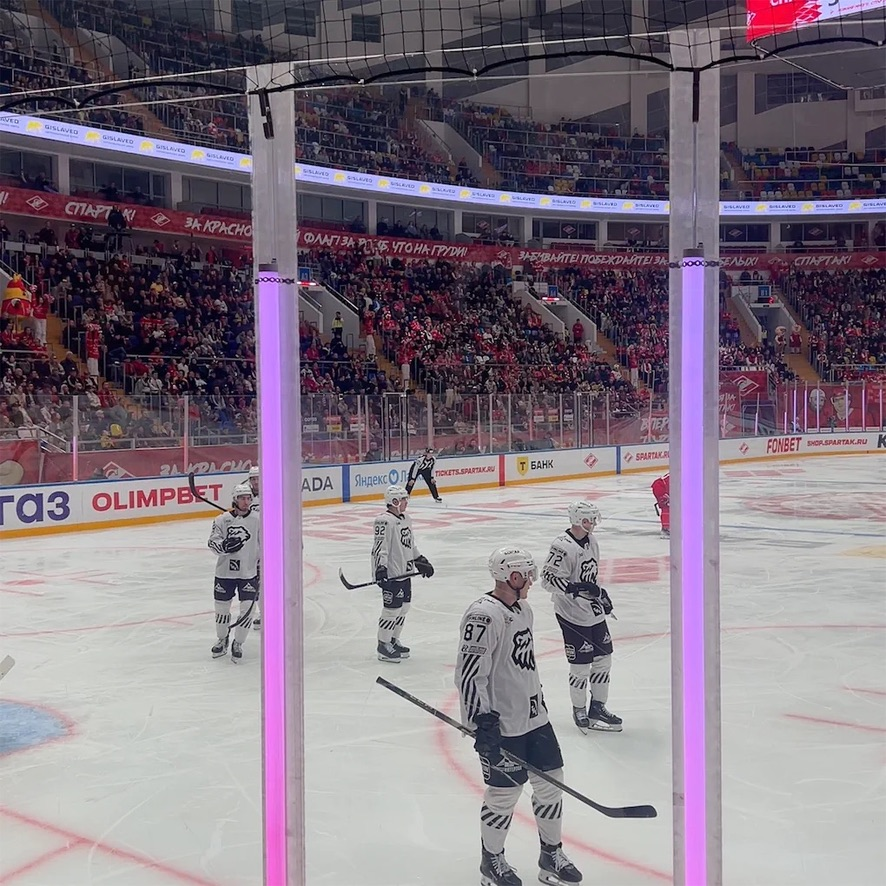